In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from pandas import DataFrame
import time
import datetime
import nltk
from sklearn.linear_model import LinearRegression
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer, word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import EnglishStemmer
from collections import Counter
from nltk.corpus import stopwords
from scipy import stats


df = pd.read_csv('bgg_db_2018_01.csv',encoding = "ISO-8859-1")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alfonsoreyna/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/alfonsoreyna/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alfonsoreyna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = df.drop(['game_id','bgg_url','image_url','rank','geek_rating','min_time','max_time', 'year'],axis=1)
df.avg_rating = df.avg_rating.astype(int)
# Eliminar filas con valores 0
df = df.drop(df[df.min_players == 0].index)
df = df.drop(df[df.age <= 0].index)
df = df.drop(df[df.weight < 0].index)
df = df.drop(df[df.avg_time <= 0].index)
df = df.drop(df[df.avg_rating <=0].index)
df.head()

,names,min_players,max_players,avg_time,avg_rating,num_votes,age,mechanic,owned,category,designer,weight
0,Gloomhaven,1,4,150,9,9841,12,"Action / Movement Programming, Co-operative Pl...",18217,"Adventure, Exploration, Fantasy, Fighting, Min...",Isaac Childres,3.7720
1,Pandemic Legacy: Season 1,2,4,60,8,23489,13,"Action Point Allowance System, Co-operative Pl...",38105,"Environmental, Medical","Rob Daviau, Matt Leacock",2.8056
2,Through the Ages: A New Story of Civilization,2,4,240,8,10679,14,"Action Point Allowance System, Auction/Bidding...",14147,"Card Game, Civilization, Economic",Vlaada Chvátil,4.3538
3,Twilight Struggle,2,2,180,8,29923,13,"Area Control / Area Influence, Campaign / Batt...",41094,"Modern Warfare, Political, Wargame","Ananda Gupta, Jason Matthews",3.5446
4,Terraforming Mars,1,5,120,8,20468,12,"Card Drafting, Hand Management, Tile Placement...",26145,"Economic, Environmental, Industry / Manufactur...",Jacob Fryxelius,3.2465


In [3]:
df.describe()

,min_players,max_players,avg_time,avg_rating,num_votes,age,owned,weight
count,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000
mean,2.035616,5.455638,108.234563,6.440042,1980.110432,10.869758,2989.987987,2.332006
std,0.667699,16.417822,452.348458,0.601641,4620.826973,2.396487,6274.498921,0.796912
min,1.000000,0.000000,1.000000,5.000000,55.000000,2.000000,46.000000,0.000000
25%,2.000000,4.000000,30.000000,6.000000,282.000000,10.000000,609.000000,1.727300
50%,2.000000,4.000000,60.000000,6.000000,617.000000,12.000000,1176.000000,2.273400
75%,2.000000,6.000000,90.000000,7.000000,1619.000000,12.000000,2696.000000,2.857100
max,8.000000,999.000000,22500.000000,9.000000,74261.000000,42.000000,106608.000000,4.904800


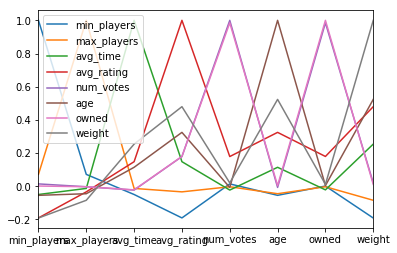

In [4]:
df.corr().plot()

In [5]:
# df['rank'].plot()

In [6]:
all_categories = ""

for x in range(0, len(df)):
    all_categories += df.iloc[x]['category']

tokenizer = RegexpTokenizer(r'\w+')
categories_no_punc = tokenizer.tokenize(all_categories.lower())
word_count_dict = Counter(w for w in categories_no_punc)
print(len(word_count_dict))

1669


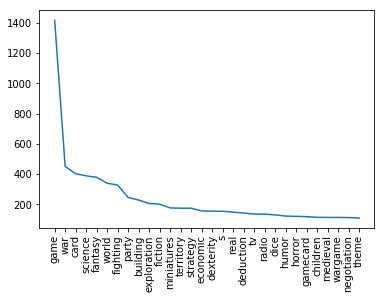

In [7]:
cwords = word_count_dict.most_common(30)
labels, values = zip(*cwords)

indexes = np.arange(len(labels))
plt.plot(indexes, values)
plt.xticks(indexes,labels,rotation=90)
plt.show()

In [8]:
all_mechanics = ""

for x in range(0, len(df)):
    all_mechanics += df.iloc[x]['mechanic']

tokenizer = RegexpTokenizer(r'\w+')
mechanics_no_punc = tokenizer.tokenize(all_mechanics.lower())
mechanics_count_dict = Counter(w for w in mechanics_no_punc)
print(len(mechanics_count_dict))
print(len(mechanics_count_dict))

1003
1003


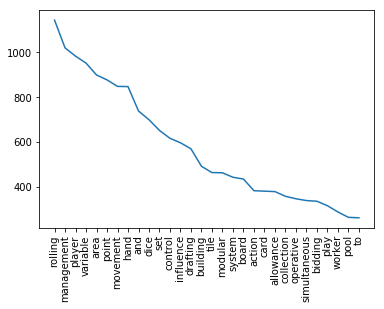

In [9]:
mwords = mechanics_count_dict.most_common(30)
labels, values = zip(*mwords)

indexes = np.arange(len(labels))
plt.plot(indexes, values)
plt.xticks(indexes,labels,rotation=90)
plt.show()

In [10]:
dr = df[df['avg_rating']>8]

In [11]:
all_categories = ""

for x in range(0, len(dr)):
    all_categories += dr.iloc[x]['category']
print(all_categories)
tokenizer = RegexpTokenizer(r'\w+')
categories_no_punc = tokenizer.tokenize(all_categories.lower())
word_count_dict = Counter(w for w in categories_no_punc)
print(word_count_dict)
print(categories_no_punc)

Adventure, Exploration, Fantasy, Fighting, MiniaturesCivilization, Economic, Negotiation, Political, Science Fiction, Space Exploration, WargameAncient, Card Game, Dice, Expansion for Base-game, Miniatures, Mythology, WargameAdventure, Exploration, Fantasy, Medieval, RenaissanceFantasy, Fighting, Medieval, Miniatures, Religious, Wargame
Counter({'exploration': 3, 'fantasy': 2, 'fighting': 2, 'game': 2, 'miniatures': 2, 'medieval': 2, 'adventure': 1, 'miniaturescivilization': 1, 'economic': 1, 'negotiation': 1, 'political': 1, 'science': 1, 'fiction': 1, 'space': 1, 'wargameancient': 1, 'card': 1, 'dice': 1, 'expansion': 1, 'for': 1, 'base': 1, 'mythology': 1, 'wargameadventure': 1, 'renaissancefantasy': 1, 'religious': 1, 'wargame': 1})
['adventure', 'exploration', 'fantasy', 'fighting', 'miniaturescivilization', 'economic', 'negotiation', 'political', 'science', 'fiction', 'space', 'exploration', 'wargameancient', 'card', 'game', 'dice', 'expansion', 'for', 'base', 'game', 'miniatures

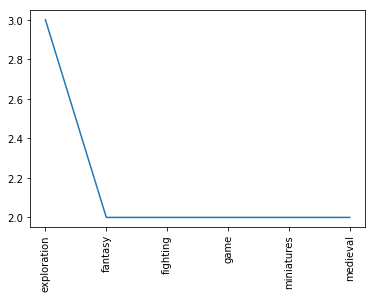

In [12]:
mwords = word_count_dict.most_common(6)
labels, values = zip(*mwords)

indexes = np.arange(len(labels))
plt.plot(indexes, values)
plt.xticks(indexes,labels,rotation=90)
plt.show()

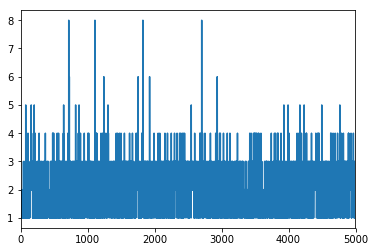

In [13]:
df['min_players'].plot()

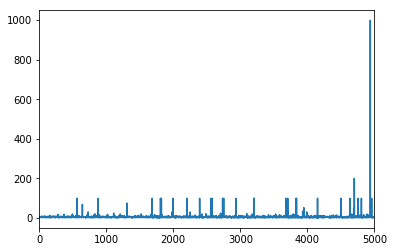

In [14]:
df['max_players'].plot()

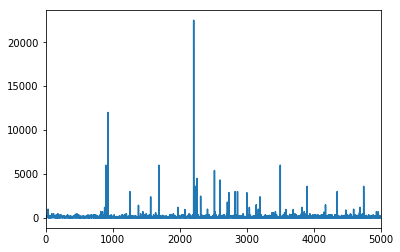

In [15]:
df['avg_time'].plot()

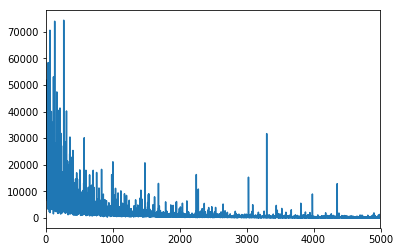

In [16]:
df['num_votes'].plot()

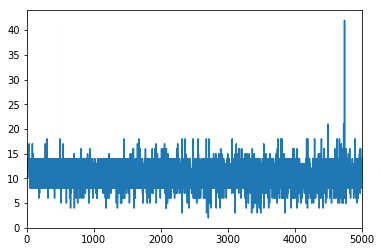

In [17]:
df['age'].plot()

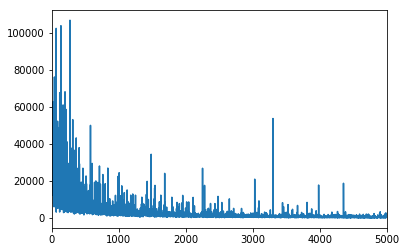

In [18]:
df['owned'].plot()

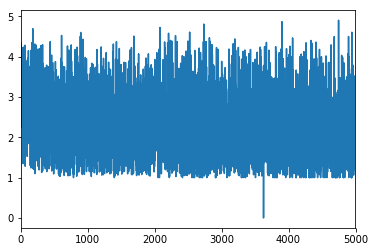

In [19]:
df['weight'].plot()

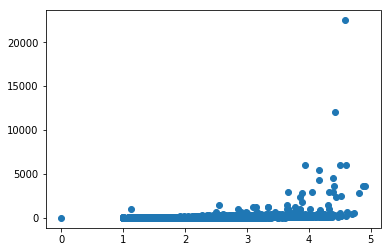

In [20]:
plt.scatter(df.weight, df.avg_time)

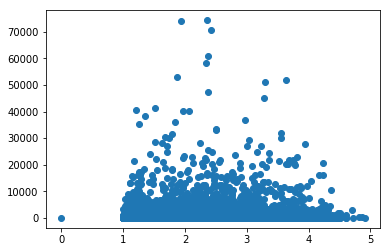

In [21]:
plt.scatter(df.weight, df.num_votes)

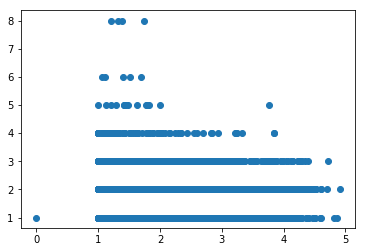

In [22]:
plt.scatter(df.weight, df.min_players)

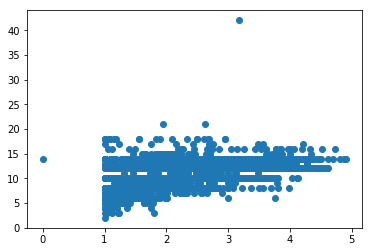

In [23]:
plt.scatter(df.weight, df.age)

In [24]:
df.columns

Index(['names', 'min_players', 'max_players', 'avg_time', 'avg_rating',
       'num_votes', 'age', 'mechanic', 'owned', 'category', 'designer',
       'weight'],
      dtype='object')

In [25]:
lemmatizer = WordNetLemmatizer() 
default_stopwords = set(nltk.corpus.stopwords.words('english'))

normalized_categories = []
normalized_mechanics = []

for key in word_count_dict:
    value = lemmatizer.lemmatize(key)
    if value not in default_stopwords:
        normalized_categories.append(lemmatizer.lemmatize(key))
    
for key in mechanics_count_dict:
    value = lemmatizer.lemmatize(key)
    if value not in default_stopwords:
        normalized_mechanics.append(lemmatizer.lemmatize(key))

print(normalized_categories)
print(len(normalized_mechanics))

['adventure', 'exploration', 'fantasy', 'fighting', 'miniaturescivilization', 'economic', 'negotiation', 'political', 'science', 'fiction', 'space', 'wargameancient', 'card', 'game', 'dice', 'expansion', 'base', 'miniature', 'mythology', 'wargameadventure', 'medieval', 'renaissancefantasy', 'religious', 'wargame']
998


In [26]:
def eval_if_normalized_word_in_text(text, normalized_word):
    tokenized = tokenizer.tokenize(str(text).lower())
    words = Counter(w for w in tokenized)
    is_in = False
    for word in words:
        if normalized_word == lemmatizer.lemmatize(word):
            is_in = True
    return is_in

In [46]:
# Asignar categorias 
for category in normalized_categories:
    df[category] = 0
    print(category)
    for index, row in df.iterrows():
        is_in = eval_if_normalized_word_in_text(row['category'], category)
        if is_in == True:
            df.at[index, category] = 1
        else:
            df.at[index, category] = 0
    
df.head()

adventure
exploration
fantasy
fighting
miniaturescivilization
economic
negotiation
political
science
fiction
space
wargameancient
card
game
dice
expansion
base
miniature
mythology
wargameadventure
medieval
renaissancefantasy
religious
wargame


,names,min_players,max_players,avg_time,avg_rating,num_votes,age,mechanic,owned,category,...,dice,expansion,base,miniature,mythology,wargameadventure,medieval,renaissancefantasy,religious,wargame
0,Gloomhaven,1,4,150,9,9841,12,"Action / Movement Programming, Co-operative Pl...",18217,"Adventure, Exploration, Fantasy, Fighting, Min...",...,0,0,0,1,0,0,0,0,0,0
1,Pandemic Legacy: Season 1,2,4,60,8,23489,13,"Action Point Allowance System, Co-operative Pl...",38105,"Environmental, Medical",...,0,0,0,0,0,0,0,0,0,0
2,Through the Ages: A New Story of Civilization,2,4,240,8,10679,14,"Action Point Allowance System, Auction/Bidding...",14147,"Card Game, Civilization, Economic",...,0,0,0,0,0,0,0,0,0,0
3,Twilight Struggle,2,2,180,8,29923,13,"Area Control / Area Influence, Campaign / Batt...",41094,"Modern Warfare, Political, Wargame",...,0,0,0,0,0,0,0,0,0,1
4,Terraforming Mars,1,5,120,8,20468,12,"Card Drafting, Hand Management, Tile Placement...",26145,"Economic, Environmental, Industry / Manufactur...",...,0,0,0,0,0,0,0,0,0,0


In [47]:
df.to_csv("final.csv")

In [48]:
#df.drop(['category', 'mechanic', 'designer', 'names'],axis=1)
df.head()

,names,min_players,max_players,avg_time,avg_rating,num_votes,age,mechanic,owned,category,...,dice,expansion,base,miniature,mythology,wargameadventure,medieval,renaissancefantasy,religious,wargame
0,Gloomhaven,1,4,150,9,9841,12,"Action / Movement Programming, Co-operative Pl...",18217,"Adventure, Exploration, Fantasy, Fighting, Min...",...,0,0,0,1,0,0,0,0,0,0
1,Pandemic Legacy: Season 1,2,4,60,8,23489,13,"Action Point Allowance System, Co-operative Pl...",38105,"Environmental, Medical",...,0,0,0,0,0,0,0,0,0,0
2,Through the Ages: A New Story of Civilization,2,4,240,8,10679,14,"Action Point Allowance System, Auction/Bidding...",14147,"Card Game, Civilization, Economic",...,0,0,0,0,0,0,0,0,0,0
3,Twilight Struggle,2,2,180,8,29923,13,"Area Control / Area Influence, Campaign / Batt...",41094,"Modern Warfare, Political, Wargame",...,0,0,0,0,0,0,0,0,0,1
4,Terraforming Mars,1,5,120,8,20468,12,"Card Drafting, Hand Management, Tile Placement...",26145,"Economic, Environmental, Industry / Manufactur...",...,0,0,0,0,0,0,0,0,0,0


In [49]:
df.adventure.describe()

count    4745.000000
mean        0.060485
std         0.238408
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: adventure, dtype: float64

In [50]:
import statsmodels.api as sm


In [51]:
y = df['avg_rating']
x = df.loc[:, df.columns != 'avg_rating']

X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=100)
kf.get_n_splits(x)

for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index, "Test: ", test_index)